# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
mouse_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_merged_df['Mouse ID'].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = mouse_merged_df[mouse_merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Display the data associated with the duplicate mouse IDs
for mouse_id in duplicate_mouse_ids:
    duplicate_data = mouse_merged_df[mouse_merged_df['Mouse ID'] == mouse_id]
    print(f"Data associated with mouse ID {mouse_id} with duplicate time points:")
    print(duplicate_data)

Data associated with mouse ID g989 with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
9

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_merged_df[~mouse_merged_df['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()


248

## Summary Statistics

In [67]:
# Group the data by the drug regimen
grouped_data = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculate the mean, median, variance, standard deviation, and SEM for each regimen
summary_stats = grouped_data.agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Display the summary statistics DataFrame
print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [74]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Define a custom aggregation function to calculate mean, median, variance, standard deviation, and SEM
# Define a custom aggregation function to calculate mean, median, variance, standard deviation, and SEM
def summary_stats(x):
    return {
        'Mean': np.mean(x),
        'Median': np.median(x),
        'Variance': np.var(x),
        'Std Deviation': np.std(x),
        'SEM': np.std(x) / np.sqrt(len(x))
    }

# Use the custom aggregation function with the agg method to calculate summary statistics
summary_stats_agg = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(summary_stats)

# Display the summary statistics DataFrame
print(summary_stats_agg)

Drug Regimen
Capomulin    {'Mean': 40.675741141, 'Median': 41.5578088799...
Ceftamin     {'Mean': 52.59117180960675, 'Median': 51.77615...
Infubinol    {'Mean': 52.88479510859551, 'Median': 51.82058...
Ketapril     {'Mean': 55.23563764047873, 'Median': 53.69874...
Naftisol     {'Mean': 54.331564658333335, 'Median': 52.5092...
Placebo      {'Mean': 54.03358078635359, 'Median': 52.28893...
Propriva     {'Mean': 52.32092986, 'Median': 50.446266345, ...
Ramicane     {'Mean': 40.21674506671052, 'Median': 40.67323...
Stelasyn     {'Mean': 54.23314911988951, 'Median': 52.43173...
Zoniferol    {'Mean': 53.23650655159341, 'Median': 51.81847...
Name: Tumor Volume (mm3), dtype: object


## Bar and Pie Charts

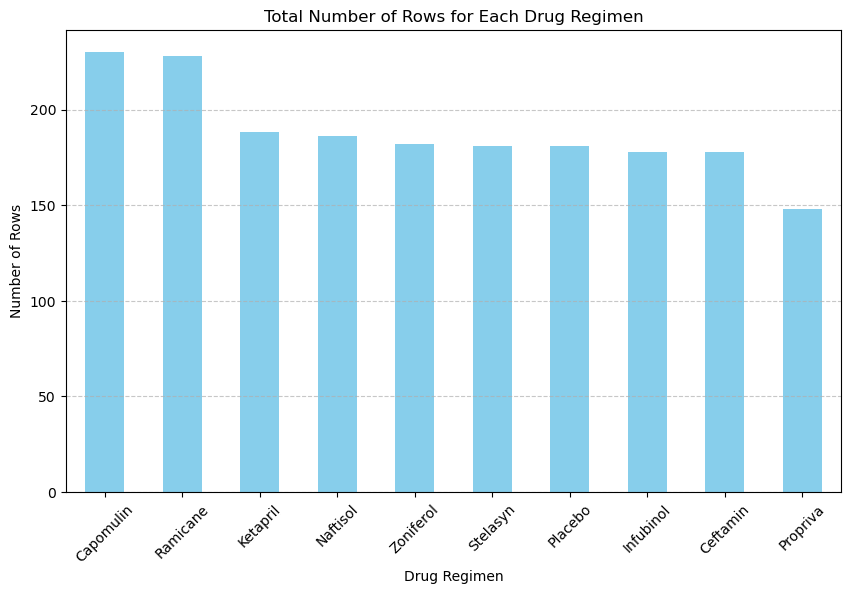

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Define the desired order of drug regimens
desired_order = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
# Group the data by the drug regimen and count the total number of rows
drug_counts = cleaned_df.groupby("Drug Regimen").size()
drug_counts = drug_counts.reindex(desired_order)

# Create a bar plot using Pandas
drug_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


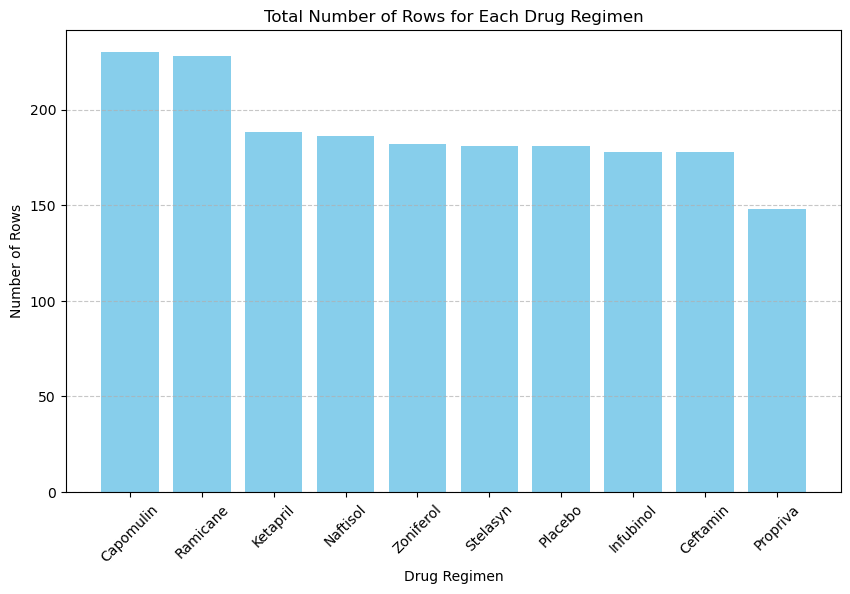

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by the drug regimen and count the total number of rows
desired_order = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
drug_counts = cleaned_df.groupby("Drug Regimen").size()

# Reorder the drug counts based on the desired order
drug_counts = drug_counts.reindex(desired_order)

# Create a bar plot using Matplotlib's PyPlot
plt.figure(figsize=(10, 6))
plt.bar(range(len(drug_counts)), drug_counts, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(range(len(drug_counts)), drug_counts.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

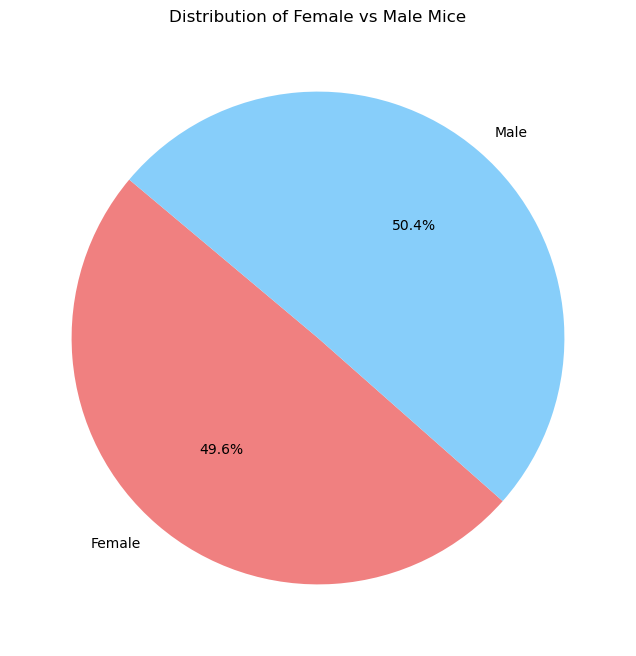

In [83]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Count the number of unique female and male mice
gender_counts = cleaned_df.groupby("Sex")["Mouse ID"].nunique()

# Create a pie chart using Pandas to show the distribution of female versus male mice
gender_counts.plot(kind='pie', colors=['lightcoral', 'lightskyblue'], autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')  
plt.show()

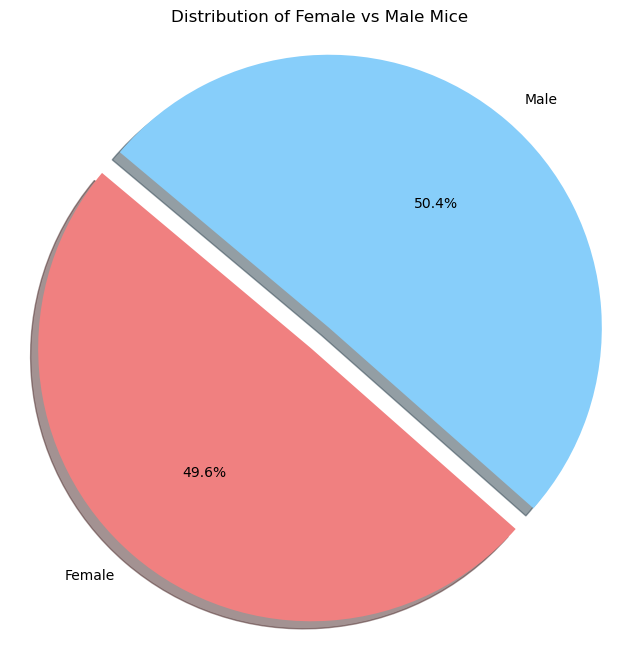

In [84]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Count the number of unique female and male mice
female_count = cleaned_df[cleaned_df["Sex"] == "Female"]["Mouse ID"].nunique()
male_count = cleaned_df[cleaned_df["Sex"] == "Male"]["Mouse ID"].nunique()

# Create a pie chart to show the distribution of female versus male mice
labels = ['Female', 'Male']
sizes = [female_count, male_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the Female slice for emphasis

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Distribution of Female vs Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Filter the DataFrame for the specified treatment regimens
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Group by 'Mouse ID' and find the row with the maximum 'Timepoint' for each mouse
max_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the max_timepoints DataFrame back to the filtered DataFrame to get the final tumor volume for each mouse
final_tumor_volumes = pd.merge(filtered_df, max_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volumes.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug = None
# Step 1: Create a grouped DataFrame with the last time point for each mouse and merge it with the original DataFrame
grouped_df = filtered_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
merged_df = pd.merge(filtered_df, grouped_df, on=["Mouse ID", "Timepoint"], how="inner")

# Step 2: Create a list of treatment names and an empty list for tumor volume data
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_data = []

# Step 3: Loop through each treatment regimen and append the final tumor volumes to the list
for drug in treatment_names:
    final_tumor_volumes = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume_data.extend(final_tumor_volumes)

# Step 4: Calculate quartiles and IQR
Q1 = np.percentile(tumor_volume_data, 25)
Q3 = np.percentile(tumor_volume_data, 75)
IQR = Q3 - Q1

# Step 5: Determine potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [x for x in tumor_volume_data if x < lower_bound or x > upper_bound]

# Print the results
print("Quartiles:")
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:", outliers)

# Locate the rows which contain mice on each drug and get the tumor volumes
# Create an empty dictionary to store tumor volumes for each drug
tumor_volumes_by_drug = {}

# Loop through each treatment regimen
for drug in treatment_names:
    # Filter the DataFrame for mice on the current drug
    drug_data = merged_df[merged_df["Drug Regimen"] == drug]
    
    # Extract tumor volumes for the current drug
    tumor_volumes = drug_data["Tumor Volume (mm3)"].tolist()
    
    # Store tumor volumes in the dictionary
    tumor_volumes_by_drug[drug] = tumor_volumes

# Print the tumor volumes for each drug
for drug, volumes in tumor_volumes_by_drug.items():
    print(f"Tumor volumes for {drug}: {volumes}")

# Determine outliers using upper and lower bounds
outliers_by_drug = {}
for drug in treatment_names:
    drug_data = merged_df[merged_df["Drug Regimen"] == drug]
    tumor_volumes = drug_data["Tumor Volume (mm3)"].tolist()
    Q1 = np.percentile(tumor_volumes, 25)
    Q3 = np.percentile(tumor_volumes, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers for the current drug
    outliers = [volume for volume in tumor_volumes if volume < lower_bound or volume > upper_bound]
    
    # Store potential outliers in the dictionary
    outliers_by_drug[drug] = outliers

# Print the potential outliers for each drug
for drug, outliers in outliers_by_drug.items():
    print(f"Potential outliers for {drug}: {outliers}")
       

Quartiles:
Q1: 37.1877438025
Q3: 59.930261755
IQR: 22.742517952499995
Lower Bound: 3.0739668737500097
Upper Bound: 94.04403868374999
Potential Outliers: []
Tumor volumes for Capomulin: [23.34359787, 28.48403281, 28.43096411, 30.48598484, 31.02392294, 31.8962384, 32.37735684, 33.32909778, 34.45529799, 37.31184577, 36.04104736, 37.07402422, 38.84687569, 38.93963263, 38.98287774, 38.75326548, 38.1251644, 39.95234669, 40.65812366, 40.1592203, 40.72857787, 41.48300765, 41.58152074, 47.68596303, 46.53920617]
Tumor volumes for Ramicane: [22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.56046955, 31.09533505, 33.39765251, 32.97852192, 33.56240217, 36.13485243, 38.81036633, 37.22565033, 36.37451039, 36.56165229, 37.31123552, 38.34200823, 38.4076183, 40.65900627, 40.66771292, 45.22086888, 43.0475426, 43.41938077, 43.16637266, 44.18345092]
Tumor volumes for Infubinol: [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876

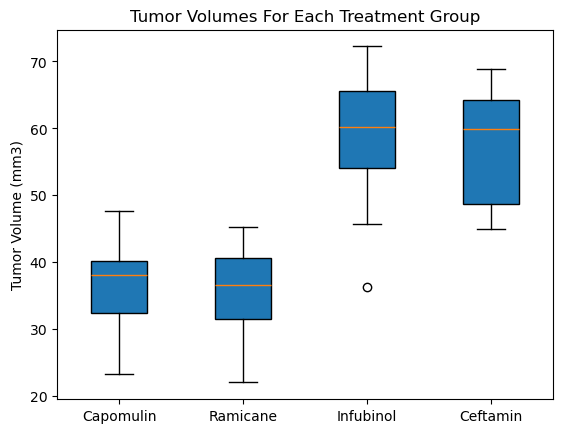

In [41]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data = [tumor_volumes_by_drug[drug] for drug in treatment_names]
fig, ax = plt.subplots()
ax.set_title('Tumor Volumes For Each Treatment Group')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(data, labels=treatment_names, patch_artist=True)  # Use treatment names as labels
plt.show()

## Line and Scatter Plots

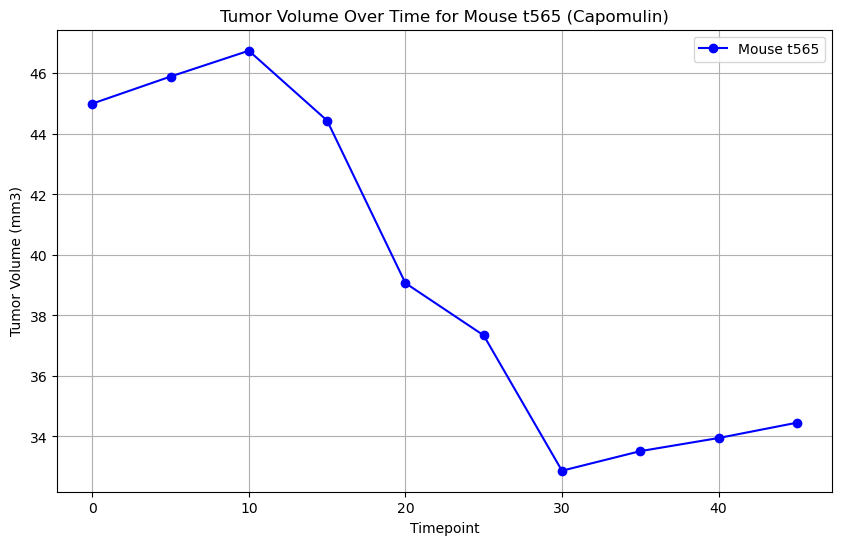

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Assuming df is your DataFrame containing the Mouse IDs
# Get a list of unique Mouse IDs from your DataFrame
# Filter the DataFrame for a single mouse treated with Capomulin
# Randomly select a Mouse ID from the DataFrame
random_mouse_id = random.choice(cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique())

# Filter the DataFrame for the randomly selected mouse treated with Capomulin
mouse_data = cleaned_df[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == random_mouse_id)]

# Extract time points and tumor volumes for the selected mouse
time_points = mouse_data["Timepoint"]
tumor_volumes = mouse_data["Tumor Volume (mm3)"]

# Create a line plot of tumor volume versus time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(time_points, tumor_volumes, marker='o', color='b', label=f"Mouse {random_mouse_id}")
plt.title(f"Tumor Volume Over Time for Mouse {random_mouse_id} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.grid(True)
plt.show()

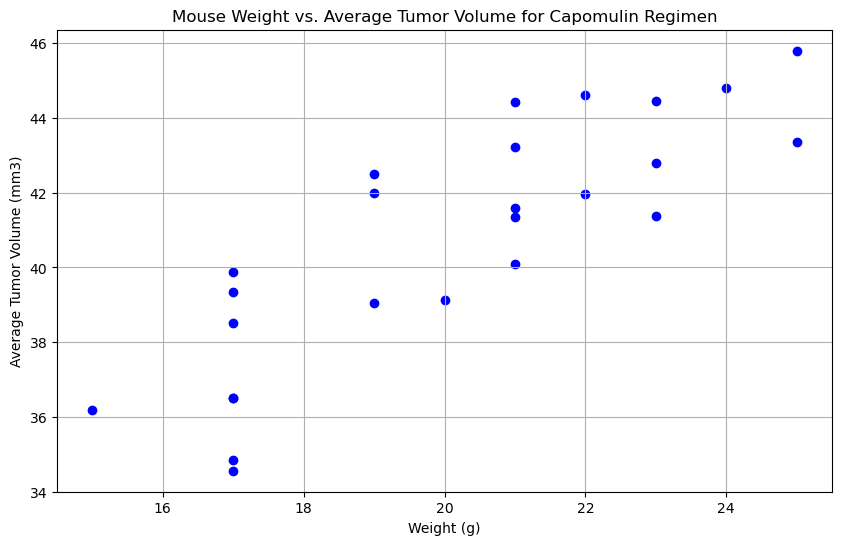

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume and weight for each mouse in the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
average_data = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})

# Create a scatter plot of mouse weight versus the average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"], color='b', marker='o')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721
Linear Regression Model: y = 0.9544396890241047 x + 21.55216053268501


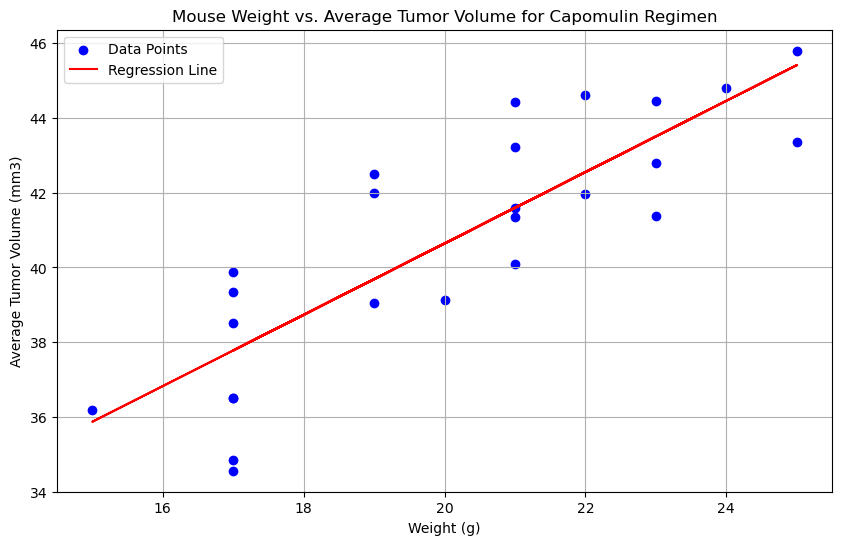

In [64]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = np.corrcoef(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"])[0, 1]

# Perform linear regression for mouse weight and average tumor volume
slope, intercept, r_value, p_value, std_err = linregress(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"])

# Print the correlation coefficient and linear regression model
print("Correlation Coefficient:", correlation)
print("Linear Regression Model: y =", slope, "x +", intercept)

# Create a scatter plot of mouse weight versus the average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"], color='b', marker='o', label="Data Points")
plt.plot(average_data["Weight (g)"], slope * average_data["Weight (g)"] + intercept, color='r', label="Regression Line")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid(True)
plt.show()